In [25]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import cv2
import numpy as np
from ImageGenerator import ImageAugmentation
import concurrent
import pandas as pd

In [65]:
dict_gender = {
    0: 'male',
    1: 'female'
}
dict_race = {
    0: 'white',
    1: 'black',
    2: 'asian',
    3: 'indian',
    4: 'others'
}

In [26]:
def load_data(directory):
    dict_data = {
        'image': [],
        'age': [],
        'gender': [],
        'race': [],
    }
    for file in os.listdir(directory):
        label = file.split('_')
        dict_data['image'].append(file)
        dict_data['age'].append(int(label[0]))
        dict_data['gender'].append(int(label[1]))
        dict_data['race'].append(int(label[2]))
    
    df_data = pd.DataFrame(dict_data)
    return df_data


In [27]:
BASE_DIR = 'data/face_age_gender_race/cropped'
df_data = load_data(BASE_DIR)

In [28]:
df_data.head()

,image,age,gender,race
0,100_0_0_20170112213500903.jpg.chip.jpg,100,0,0
1,100_0_0_20170112215240346.jpg.chip.jpg,100,0,0
2,100_1_0_20170110183726390.jpg.chip.jpg,100,1,0
3,100_1_0_20170112213001988.jpg.chip.jpg,100,1,0
4,100_1_0_20170112213303693.jpg.chip.jpg,100,1,0


<Axes: >

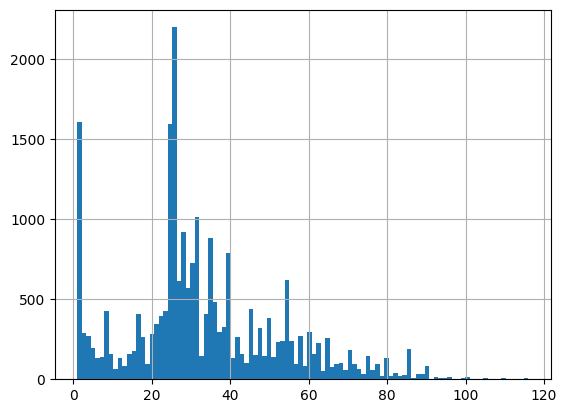

In [29]:
df_data['age'].hist(bins=100)

<Axes: xlabel='gender'>

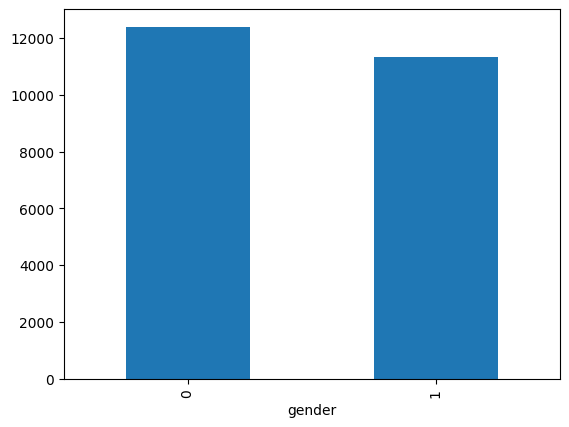

In [30]:
df_data['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='race'>

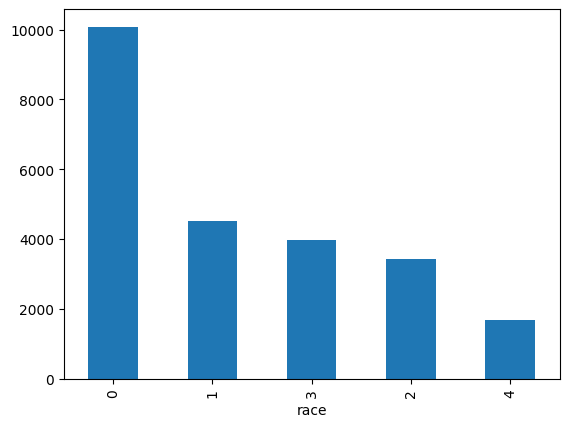

In [31]:
df_data['race'].value_counts().plot(kind='bar')

In [58]:
def load_image(df,base_dir):
    images = []
    labels = []
    for i in range(len(df)):
        image = cv2.imread(os.path.join(base_dir,df['image'][i]),cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(300,300))
        images.append(image)
        labels.append([df['age'][i],df['gender'][i],df['race'][i]])
    return np.array(images),np.array(labels)

In [59]:
images, labels = load_image(df_data, BASE_DIR)
images.shape, labels.shape

((23705, 300, 300, 3), (23705, 3))

In [70]:
def show_sample_images(images, labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    for i in range(num_images):
        index = np.random.randint(0, len(images))
        axes[i].imshow(images[index])
        axes[i].set_title(f'{labels[index][0]} years, {dict_gender[labels[index][1]]}, {dict_race[labels[index][2]]}', fontsize=8)
        axes[i].axis('off')
    plt.show()

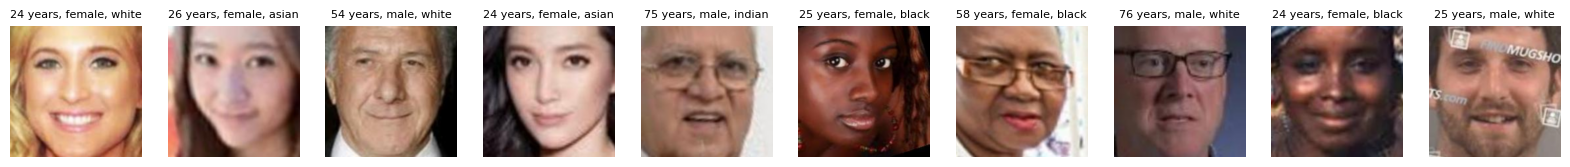

In [73]:
show_sample_images(images, labels)